In [67]:
# import pandas package
# use the alias pd (community agreed)
import pandas as pd

# import pyplot
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# read a csv file using pandas
titanic_df = pd.read_csv('data/titanic-data.csv')

In [5]:
# show what's inside the file
# but let's show only the first 20 rows
titanic_df
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Picking a subset of the DataFrame

In [7]:
# I don't need all the columns
# so, I will only pick the columns Sex, Age and Survived
df = titanic_df[['Sex', 'Age', 'Survived']]
df

,Sex,Age,Survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0
...,...,...,...
886,male,27.0,0
887,female,19.0,1
888,female,NaN,0
889,male,26.0,1


In [110]:
# I want to see how may survived 
# and did not survived by sex or gender
groupby = df[["Sex", "Survived"]].groupby(["Sex","Survived"])["Sex"].count()
groupby

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

<Axes: title={'center': 'Titanic Data'}, xlabel='Gender', ylabel='Count'>

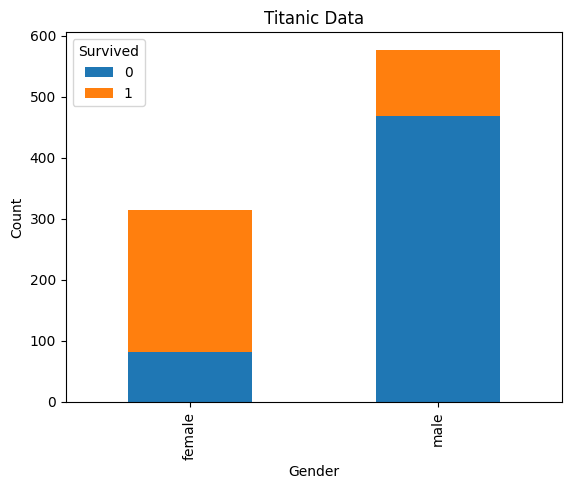

In [84]:
# fig, ax = plt.subplots()

# let's show a bar graph
# of the data above
agg = df[["Sex", "Survived"]].groupby(["Sex","Survived"]).size().unstack()
agg.plot(kind='bar', stacked=True, ylabel='Count', xlabel='Gender', title="Titanic Data")

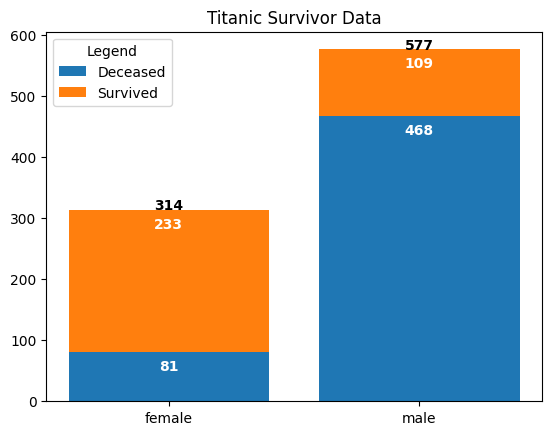

In [114]:
fig, ax = plt.subplots()
bottom = np.zeros(len(agg))

# plot first the survivor count
# ax.bar(agg.index, agg[1], label='Survived')
# plot the deceased count
# ax.bar(agg.index, agg[0], label='Deceased', bottom=agg[1])

for i, col in enumerate(agg.columns):
    ax.bar(agg.index, agg[col], 
#            label='Deceased' if col == 0 else 'Survived', 
           label=col,
           bottom=bottom)
    bottom += np.array(agg[col])

    
count = agg.sum(axis=1)
y_offset = 0
for i, c in enumerate(count):
    ax.text(count.index[i], 
            c + y_offset, 
            round(c), 
            ha='center', 
            weight='bold')
    
y_offset = -30
for b in ax.patches:
    ax.text(
        b.get_x() + b.get_width() / 2,
        b.get_height() + b.get_y() + y_offset,
        round(b.get_height()),
        # labels
        ha='center', 
        weight='bold',
        size=10,
        color='w'
    )
    
ax.set_title("Titanic Survivor Data")
ax.legend(['Deceased', 'Survived'], title='Legend')